In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("who_suicide_statistics.csv")

In [3]:
df.head()

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,female,25-34 years,NaN,246800.0
2,Albania,1985,female,35-54 years,NaN,267500.0
3,Albania,1985,female,5-14 years,NaN,298300.0
4,Albania,1985,female,55-74 years,NaN,138700.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43776 entries, 0 to 43775
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      43776 non-null  object 
 1   year         43776 non-null  int64  
 2   sex          43776 non-null  object 
 3   age          43776 non-null  object 
 4   suicides_no  41520 non-null  float64
 5   population   38316 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.0+ MB


In [5]:
print (("Rows , Columns:") + str(df.shape))
df.columns

Rows , Columns:(43776, 6)


Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population'], dtype='object')

In [6]:
df.isna() .sum()

country           0
year              0
sex               0
age               0
suicides_no    2256
population     5460
dtype: int64

In [7]:
df=df.fillna(0)
df.isna().sum()

country        0
year           0
sex            0
age            0
suicides_no    0
population     0
dtype: int64

In [8]:
df['age'].unique()

array(['15-24 years', '25-34 years', '35-54 years', '5-14 years',
       '55-74 years', '75+ years'], dtype=object)

In [9]:
df['country'].unique()

array(['Albania', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bermuda', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil',
       'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria',
       'Cabo Verde', 'Canada', 'Cayman Islands', 'Chile', 'Colombia',
       'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic',
       'Denmark', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'Falkland Islands (Malvinas)', 'Fiji',
       'Finland', 'France', 'French Guiana', 'Georgia', 'Germany',
       'Greece', 'Grenada', 'Guadeloupe', 'Guatemala', 'Guyana', 'Haiti',
       'Honduras', 'Hong Kong SAR', 'Hungary', 'Iceland',
       'Iran (Islamic Rep of)', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kiribati', 'Kuwait',
       'Kyrgyzstan', 'Latvia', 'Lithuania

In [10]:
df['country'].nunique()

141

In [11]:
df['year'].unique()

array([1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 1983, 1984,
       2016, 1979, 1980, 1981, 1982])

In [12]:
df['suicides_no'] = df['suicides_no'].replace(0,np.NAN)

mean_value=df['suicides_no'].mean()
df['suicides_no']=df['suicides_no'].fillna(mean_value)

def find_minmax(x):
     #use the function 'idmin' to find the index of lowest suicide
    min_index = df[x].idxmin()
    #use the function 'idmax' to find the index of Highest suicide
    high_index = df[x].idxmax()
    
    high = pd.DataFrame(df.loc[high_index,:])
    low = pd.DataFrame(df.loc[min_index,:])
    
    #print the Year with high and low suicide
    print("Year Which Has Highest "+ x + " : ",df['year'][high_index])
    print("Year Which Has Lowest "+ x + "  : ",df['year'][min_index])
    return pd.concat([high,low],axis = 1)

find_minmax('suicides_no')

Year Which Has Highest suicides_no :  1994
Year Which Has Lowest suicides_no  :  1987


,33128,29
country,Russian Federation,Albania
year,1994,1987
sex,male,female
age,35-54 years,75+ years
suicides_no,22338.0,1.0
population,19044200.0,35600.0


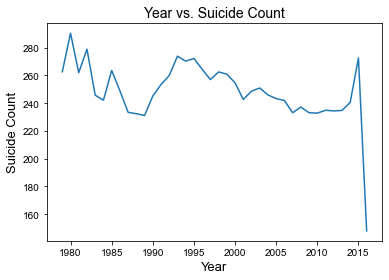

In [13]:
# year-wise analysis of mean number sucidies of each year             
df.groupby('year')['suicides_no'].mean().plot()  #setup the title and labels of the figure.
plt.title("Year vs. Suicide Count",fontsize = 14) 
plt.xlabel('Year',fontsize = 13) 
plt.ylabel('Suicide Count',fontsize = 13)  
#setup the figure size. sns.set(rc={'figure.figsize':(10,5)})
sns.set_style("whitegrid")

In [14]:
def find_minmax(x):
     #use the function 'idmin' to find the index of lowest suicide
    min_index = df[x].idxmin()
    #use the function 'idmax' to find the index of Highest suicide
    high_index = df[x].idxmax()
    
    high = pd.DataFrame(df.loc[high_index,:])
    low = pd.DataFrame(df.loc[min_index,:])
    
    #print the country with high and low suicide
    print("Country Which Has Highest "+ x + " : ",df['country'][high_index])
    print("Country Which Has Lowest "+ x + "  : ",df['country'][min_index])
    return pd.concat([low,high],axis = 1)

find_minmax('suicides_no')

Country Which Has Highest suicides_no :  Russian Federation
Country Which Has Lowest suicides_no  :  Albania


,29,33128
country,Albania,Russian Federation
year,1987,1994
sex,female,male
age,75+ years,35-54 years
suicides_no,1.0,22338.0
population,35600.0,19044200.0


In [15]:
# perform operation
df['suicide_per_pop'] = df['suicides_no']/df['population']
df.tail(3)

,country,year,sex,age,suicides_no,population,suicide_per_pop
43773,Zimbabwe,1990,male,5-14 years,6.0,0.0,inf
43774,Zimbabwe,1990,male,55-74 years,74.0,0.0,inf
43775,Zimbabwe,1990,male,75+ years,13.0,0.0,inf


In [16]:
find_minmax('suicide_per_pop')

Country Which Has Highest suicide_per_pop :  Anguilla
Country Which Has Lowest suicide_per_pop  :  Egypt


,12993,372
country,Egypt,Anguilla
year,2005,1983
sex,male,female
age,5-14 years,15-24 years
suicides_no,1.0,249.106328
population,9543088.0,0.0
suicide_per_pop,0.0,inf


In [17]:
sample = df.sample(3)
sample

,country,year,sex,age,suicides_no,population,suicide_per_pop
17205,Guatemala,2014,male,5-14 years,6.0,1987907.0,0.000003
12432,Ecuador,1979,female,15-24 years,56.0,770000.0,0.000073
32089,Republic of Moldova,2012,female,25-34 years,5.0,311484.0,0.000016


In [18]:
# grabs first 2 chars from Age Column
df['AgeNum'] = df['age'].str[:2]

# remove all instances of dash -
df['AgeNum'] = df['AgeNum'].map(lambda x: x.replace('-',''))

# now, convert it to type int (not Object)
df['AgeNum'] = df['AgeNum'].astype(int)

df['AgeNum'].tail(3)

43773     5
43774    55
43775    75
Name: AgeNum, dtype: int64

In [19]:
# creates Age Categories
def AgeGroup(x):
    if(x >= 60):
        return "Elderly"
    elif(x >= 30):
        return "Middle_Aged_Adults"
    elif(x >= 18):
        return "Adults"
    else:
        return "Adolescent"
# Map each row in the Col to the AgeGroup Method
df['AgeCategory'] =df['AgeNum'].map(lambda x: AgeGroup(x))
# convert it back to type String
df['AgeCategory'] = df['AgeCategory'].astype(str)
df['AgeCategory'].tail(3)

43773            Adolescent
43774    Middle_Aged_Adults
43775               Elderly
Name: AgeCategory, dtype: object

In [20]:
df['AgeNum'] .tail(3)

43773     5
43774    55
43775    75
Name: AgeNum, dtype: int64

In [21]:
df.head(3)

,country,year,sex,age,suicides_no,population,suicide_per_pop,AgeNum,AgeCategory
0,Albania,1985,female,15-24 years,249.106328,277900.0,0.000896,15,Adolescent
1,Albania,1985,female,25-34 years,249.106328,246800.0,0.001009,25,Adults
2,Albania,1985,female,35-54 years,249.106328,267500.0,0.000931,35,Middle_Aged_Adults


Text(3.9250000000000043, 0.5, 'Suicide Count')

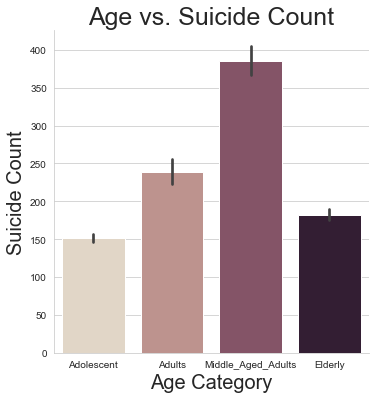

In [22]:
sns.catplot(x="AgeCategory", y="suicides_no",palette="ch:.25", kind="bar",data=df);

plt.title('Age vs. Suicide Count',size=25)
plt.xlabel('Age Category',size=20)
plt.ylabel('Suicide Count',size=20)

In [23]:
# there is an equal number of Males & Females in our data
df['sex'].value_counts()

male      21888
female    21888
Name: sex, dtype: int64

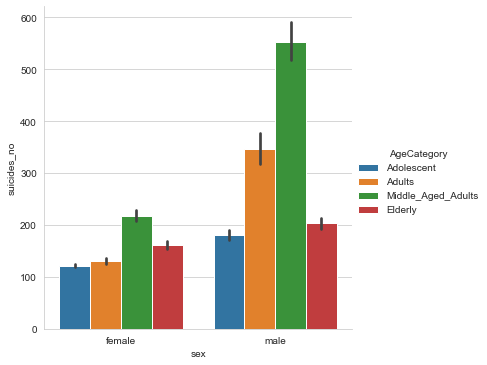

In [24]:
sns.catplot(x="sex", y="suicides_no", hue="AgeCategory", kind="bar", data=df);

In [25]:
newData= df.loc[:,['year','sex','AgeNum','suicides_no']]
newData.head(3)
X = newData.iloc[:, :-1].values # grab the every col except last
y = newData.iloc[:, -1].values # grab last col

In [26]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)

In [28]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)


LinearRegression()

In [29]:
print(regressor.predict([[1,0,2001,55]]))

[186.81518101]
